# AC Simulation Example

In this example, we run a **AC** simulation of an ideal LDO model.

This is the same code saved in the **20_AC.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [1]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

fname = "VRM_GainBW"

run = pqs(fname)

run.InitPlot()

run.qsch2cir()
run.cir2qraw()

run.setNline(199)

df = run.LoadQRAW(["V(vout)"])

df = run.GainPhase(df, "V(vout)", "gain", "phase")

# Bring back some data "real"
run.comp2real(df, ["Step", "gain", run.sim['Xlbl']])

print(df)

             Freq                       V(vout)  Step        gain  \
0    1.000000e+00  911837.335958- 11388.964345j   0.0  119.199025   
1    1.096986e+00  911798.215591- 12736.912744j   0.0  119.198822   
2    1.203378e+00  911752.322222- 14195.455127j   0.0  119.198590   
3    1.320088e+00  911698.242840- 15776.598004j   0.0  119.198323   
4    1.448118e+00  911634.327084- 17493.466022j   0.0  119.198012   
..            ...                           ...   ...         ...   
395  6.905514e+07      -0.000091-     0.009586j   1.0  -40.367113   
396  7.575250e+07      -0.000076-     0.008746j   1.0  -41.163222   
397  8.309942e+07      -0.000063-     0.007972j   1.0  -41.968396   
398  9.115888e+07      -0.000052-     0.007259j   1.0  -42.782042   
399  1.000000e+08      -0.000043-     0.006604j   1.0  -43.603625   

                    phase  
0    -0.715594+ 0.000000j  
1    -0.800313+ 0.000000j  
2    -0.891990+ 0.000000j  
3    -0.991383+ 0.000000j  
4    -1.099321+ 0.000000j  
.. 

Note that the gain calculation of "df = df.apply()" makes everything "complex".  So we re-convert known "non-complex" data to "real".

## 2. Plotting

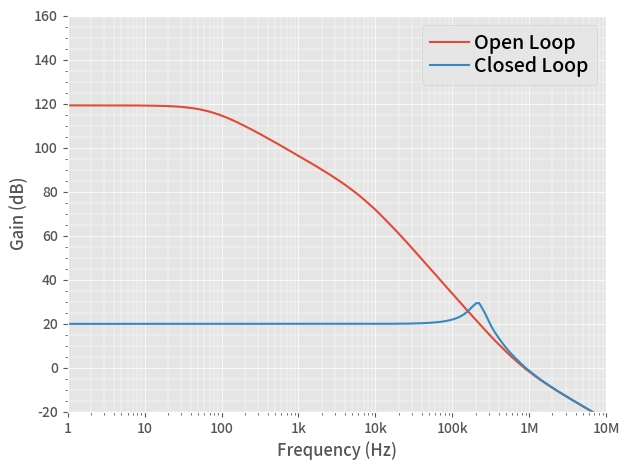

In [2]:
# Prepare a blank plotting area
fig, ax = plt.subplots(tight_layout=True)

# Plot AC curves of all ".STEP" (we know only 2 steps)
df[df.Step == 0].plot(ax=ax, x="Freq",  y="gain", label="Open Loop")
df[df.Step == 1].plot(ax=ax, x="Freq",  y="gain", label="Closed Loop")

run.PrepFreqGainPlot(ax, "Frequency (Hz)", "Gain (dB)", [1,10e6], [-20,160])

# Save the Plot in PNG file
plt.savefig(run.path['base'] + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')